In [1]:
'''
PURPOSE: 
1. Build a classifier that classifies actors as male or female
2. Build various training sizes of actors in act, train and plot the performance vs size for 
    a. training set
    b. validation set
    c. validation set made of actors not from act (basically your test set)
'''

'\nPURPOSE: \n1. Build a classifier that classifies actors as male or female\n2. Build various training sizes of actors in act, train and plot the performance vs size for \n    a. training set\n    b. validation set\n    c. validation set made of actors not from act (basically your test set)\n'

In [119]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [78]:
def replace_labels(y,labels):
    y_relabeled = np.copy(y)
    for label in labels:
        for index in np.where(y == label[0]):
            np.put(y_relabeled, index, label[1])
    return y_relabeled.astype(int)

def flatten_set(x):
    #returned ndarray should have shape (N, M), where N = # pixels and M = # images
    for i in range(x.shape[-1]):
        flattened_image = x[...,i].flatten() 
        if i == 0:
            x_flattened = flattened_image
        else:
            x_flattened = np.vstack((x_flattened, flattened_image))
            
    return x_flattened.T

def cost(x,y,theta):
    #quadratic cost function
    #x = np.vstack( (np.ones((1, x.shape[1])), x))
    return np.sum( (y - np.dot(theta.T,x)) ** 2)

def dcost_dtheta(x,y,theta):
    #x = np.vstack( (np.ones((1, x.shape[1])), x))
    return -2*np.sum((y-np.dot(theta.T, x))*x, 1)


def grad_descent(cost, dcost_dtheta, x, y, init_theta, alpha,max_iter):
    EPS = 1e-5   #EPS = 10**(-5)
    prev_t = init_theta-10*EPS
    t = init_theta.copy()
    itr  = 1
 
    while np.linalg.norm(t - prev_t) >  EPS and itr < max_iter:
        prev_t = t.copy()
        t -= alpha*dcost_dtheta(x, y, t)
#        if itr % 50 == 0:
#            print "Iter", itr
#            print ("cost(x) = %.2f" %  cost(x, y, t)) 
            
#            print "t = (%.2f, %.2f, %.2f), cost(x) = %.2f" % (t[0], t[1], t[2], cost(x, y, t)) 
#            print "Gradient: ", dcost_dtheta(x, y, t), "\n"
#            y_pred = pred_y(x,t)
#            print("Performance: ",performance(y_pred,y_val))
        itr += 1  
    return t


def pred_y(x,theta):

    #x = np.vstack((np.ones((1, x.shape[1])), x ))    
    h_all = np.dot(theta.T,x)
    y_pred = np.ones(h_all.shape[0])
    
    for i in range(h_all.shape[0]):
        h=h_all[i]
        if h > 0.5:
            y_pred[i] = 1
        elif h < 0.5:
            y_pred[i] = 0
        else:
            random.seed(5000)
            y_pred[i]=randint(0,1)
    return y_pred


def performance(y_pred, y_actual):
    sum = 0.0
    test_size = y_actual.shape[0]
    for i in range(test_size):
        if y_pred[i] == y_actual[i]:
            sum +=1
    return sum/test_size * 100



In [178]:
#train size: 2
x_train2 = np.load("x_train2.npy")
y_train2 = np.load("y_train2.npy")
x_val2 = np.load("x_val2.npy")
y_val2 = np.load("y_val2.npy")

#train size: 20
x_train3 = np.load("x_train3.npy")
y_train3 = np.load("y_train3.npy")
x_val3 = np.load("x_val3.npy")
y_val3 = np.load("y_val3.npy")

#train size: 50
x_train4 = np.load("x_train4.npy")
y_train4 = np.load("y_train4.npy")
x_val4 = np.load("x_val4.npy")
y_val4 = np.load("y_val4.npy")

#train size: 70
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_val = np.load("x_val.npy")
y_val = np.load("y_val.npy")

#train size: 99
x_train5 = np.load("x_train5.npy")
y_train5 = np.load("y_train5.npy")
x_val5 = np.load("x_val5.npy")
y_val5 = np.load("y_val5.npy")


#validation set size: 10 (made of actors not in set)
x_val_others = np.load("x_val_other_actors.npy")
y_val_others = np.load("y_val_other_actors.npy")

In [80]:
labels =   [("Alec Baldwin",0), ("Steve Carell",0), ("Lorraine Bracco",1),("Peri Gilpin",1),("Bill Hader",0),("Angie Harmon",1), ("Daniel Radcliffe", 0), ("America Ferrera", 1), ("Fran Drescher",1), ("Gerard Butler",0),("Kristin Chenoweth",0),("Michael Vartan",1)]

In [137]:
#store performance
perfs = np.ones((3,5))
sizes =np.array([2,20,50,70, 99])
perfs = np.vstack((sizes,perfs))

In [138]:
x_train_list = [x_train2, x_train3, x_train4, x_train, x_train5]
x_val_list = [x_val2, x_val3, x_val4, x_val, x_val5]
y_train_list = [y_train2, y_train3, y_train4, y_train, y_train5]
y_val_list = [y_val2, y_val3, y_val4,y_val,  y_val5]


/Users/Admin/anaconda3/envs/CSC411_py2_env/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [139]:
for i in range(len(x_train_list)):
    print("iteration: %d" % i)
    y_tr = y_train_list[i]
    y_tr = replace_labels(y_tr,labels)
    
    y_v = y_val_list[i]
    y_v = replace_labels(y_v,labels)
    
    x_tr = x_train_list[i]
    x_tr = flatten_set(x_tr) / 255.0
    
    x_v = x_val_list[i]
    x_v = flatten_set(x_v) / 255.0
    
    x_tr_w_bias =  np.vstack( (np.ones((1, x_tr.shape[1])), x_tr))
    x_v_w_bias = np.vstack( (np.ones((1, x_v.shape[1])), x_v) )
    
    random.seed(5000)
    theta0 = np.random.normal( 0, 0.1, x_tr.shape[0]+1)
    theta = grad_descent(cost, dcost_dtheta, x_tr_w_bias, y_tr, theta0, 0.0000001,30000)
    

    y_pred_tr= pred_y(x_tr_w_bias, theta)
    y_pred_v = pred_y(x_v_w_bias, theta)
    y_pred_val_others = pred_y(x_val_others_w_bias, theta)


    perf_tr = performance(y_pred_tr,y_tr)
    perf_v = performance(y_pred_v,y_v)
    perf_others = performance(y_pred_val_others,y_val_others)
    
    perfs[1,i] = perf_tr
    perfs[2,i] = perf_v
    perfs[3,i] = perf_others
    


iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4


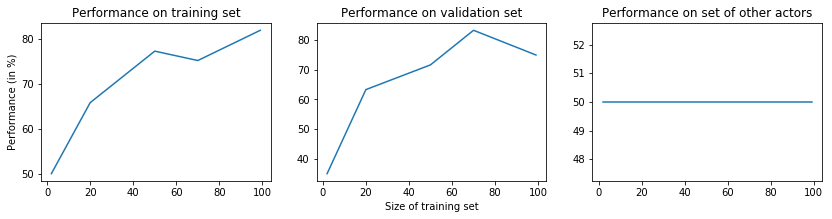

In [170]:
fig = plt.figure(figsize=(14, 3))
plt.gcf().subplots_adjust(bottom=0.15)

a = fig.add_subplot(1,3,1)
a.set_title("Performance on training set")
a.set_ylabel("Performance (in %)")
plt.plot(perfs[0,:],perfs[1,:])

b = fig.add_subplot(1,3,2)
b.set_title("Performance on validation set")
b.set_xlabel("Size of training set")
plt.plot(perfs[0,:],perfs[2,:])

c = fig.add_subplot(1,3,3)
c.set_title("Performance on set of other actors")
plt.plot(perfs[0,:],perfs[3,:])

plt.savefig("Figures_Part5.pdf")


In [180]:
# pixel_inten_mean = np.mean(x_train)
# pixel_inten_std  = np.std(x_train)



#check performance on validation set created by other actors using different parameters
y_train = replace_labels(y_train,labels)
y_val = replace_labels(y_val,labels)
x_train = flatten_set(x_train) / 255.0
x_train_w_bias =  np.vstack( (np.ones((1, x_train.shape[1])), x_train))

y_val_others = replace_labels(y_val_others, labels)
x_val_others = flatten_set(x_val_others) / 255.0
x_val_others_w_bias = np.vstack( (np.ones((1, x_val_others.shape[1])), x_val_others)) 

np.random.seed(5000)
theta0 = np.random.normal( 0, 0.05, x_train.shape[0]+1) #of dimension (1025,)


In [182]:
theta_for_others = grad_descent(cost, dcost_dtheta, x_train_w_bias, y_train, theta0, 0.0000001,30000)



In [183]:
y_pred_val_others = pred_y(x_val_others_w_bias, theta_for_others)
performance_val_others = performance(y_pred_val_others,y_val_others)
print(performance_val_others)

68.3333333333
